In [1]:
import numpy as np
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.utils import to_categorical

# Chargement des données
digits = load_digits()
X = digits.data  # shape (1797, 64)
y = digits.target  # valeurs entre 0 et 9

# Normalisation
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Encodage one-hot des labels
y_encoded = to_categorical(y, num_classes=10)

# Split train/test
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y_encoded, test_size=0.2, random_state=42)

# Définition du modèle dense
model = Sequential([
    Input(shape=(64,)),
    Dense(32, activation='relu'),
    Dense(32, activation='relu'),
    Dense(10, activation='softmax')
])

# Compilation
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Entraînement
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.1)

# Évaluation
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f'Accuracy sur test: {test_acc:.4f}')


Epoch 1/20
41/41 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.2433 - loss: 2.1581 - val_accuracy: 0.5764 - val_loss: 1.7182
Epoch 2/20
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6446 - loss: 1.4435 - val_accuracy: 0.8194 - val_loss: 1.1146
Epoch 3/20
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8310 - loss: 0.8894 - val_accuracy: 0.8819 - val_loss: 0.7231
Epoch 4/20
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8769 - loss: 0.5418 - val_accuracy: 0.9097 - val_loss: 0.5270
Epoch 5/20
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9127 - loss: 0.3695 - val_accuracy: 0.9375 - val_loss: 0.4202
Epoch 6/20
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9394 - loss: 0.2802 - val_accuracy: 0.9444 - val_loss: 0.3617
Epoch 7/20
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9569 - loss: 0.2221 - val_accuracy: 0.9444 - val_loss: 0.3200
Epoch 8/20
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9586 - loss: 0.1762 - val_accuracy: 0.9444 - val_loss:

12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


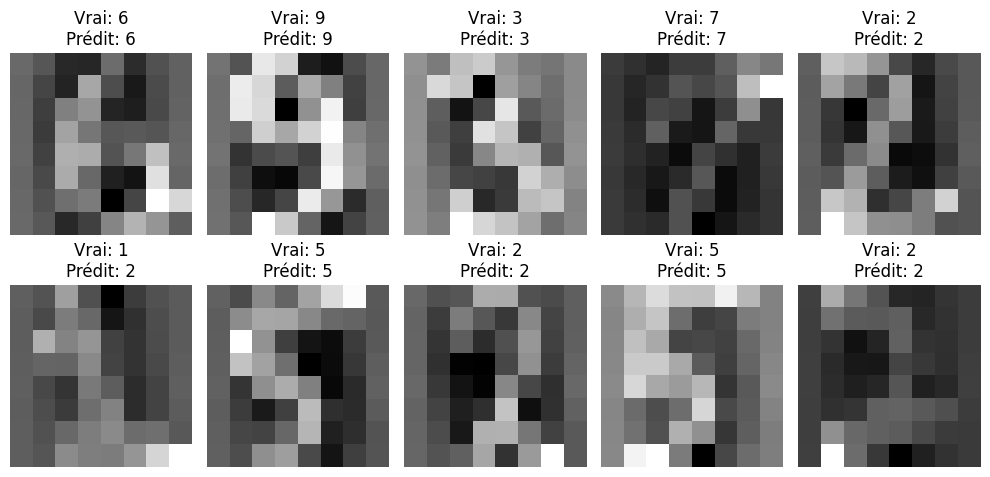

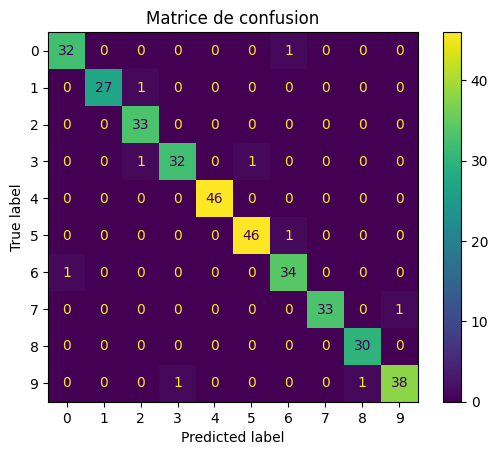

In [2]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import numpy as np

# Prédictions
y_pred_proba = model.predict(X_test)
y_pred = np.argmax(y_pred_proba, axis=1)
y_true = np.argmax(y_test, axis=1)

# Affichage de quelques images avec prédiction
plt.figure(figsize=(10, 5))
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(X_test[i].reshape(8, 8), cmap='gray')
    plt.title(f"Vrai: {y_true[i]}\nPrédit: {y_pred[i]}")
    plt.axis('off')
plt.tight_layout()
plt.show()

# Matrice de confusion
cm = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=range(10))
disp.plot(cmap='viridis')
plt.title("Matrice de confusion")
plt.show()



In [3]:
history_dict = history.history
print(history_dict.keys())

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


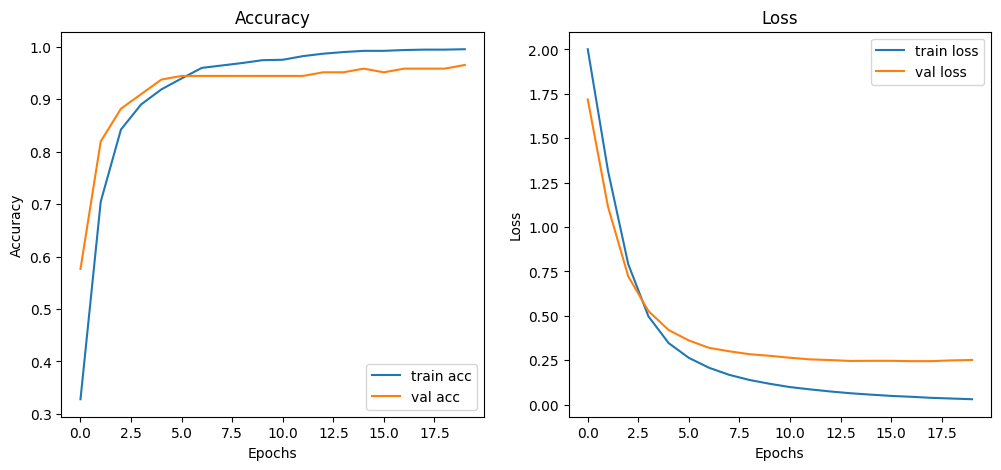

In [4]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history_dict['accuracy'], label='train acc')
plt.plot(history_dict['val_accuracy'], label='val acc')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history_dict['loss'], label='train loss')
plt.plot(history_dict['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

In [5]:
# Poursuite de l'entraînement du modèle existant
history_continued = model.fit(
    X_train, y_train,
    epochs=200,  # on part de 20, donc ça va jusqu’à epoch 220
    initial_epoch=20,  # important pour continuer à epoch=21
    batch_size=32,
    validation_split=0.1
)

# Affichage des nouvelles courbes
hist_full = history_continued.history

Epoch 21/200
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9985 - loss: 0.0252 - val_accuracy: 0.9653 - val_loss: 0.2526
Epoch 22/200
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9966 - loss: 0.0245 - val_accuracy: 0.9653 - val_loss: 0.2545
Epoch 23/200
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9973 - loss: 0.0202 - val_accuracy: 0.9653 - val_loss: 0.2588
Epoch 24/200
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9978 - loss: 0.0183 - val_accuracy: 0.9653 - val_loss: 0.2620
Epoch 25/200
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9965 - loss: 0.0220 - val_accuracy: 0.9583 - val_loss: 0.2620
Epoch 26/200
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9988 - loss: 0.0150 - val_accuracy: 0.9653 - val_loss: 0.2658
Epoch 27/200
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0149 - val_accuracy: 0.9653 - val_loss: 0.2672
Epoch 28/200
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0128 - val_accuracy: 0.

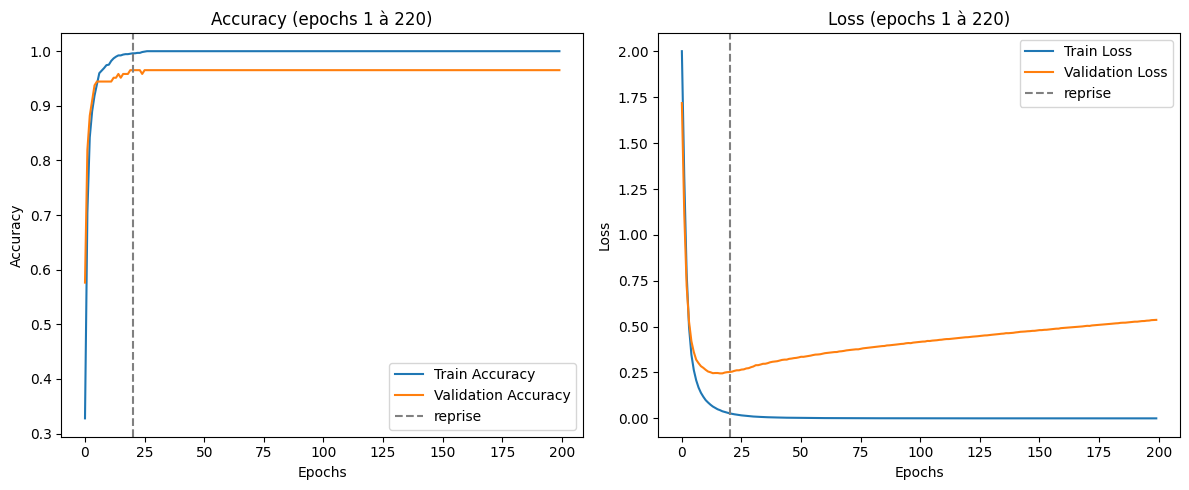

In [6]:
# Fusion des historiques
full_accuracy = history.history['accuracy'] + history_continued.history['accuracy']
full_val_accuracy = history.history['val_accuracy'] + history_continued.history['val_accuracy']
full_loss = history.history['loss'] + history_continued.history['loss']
full_val_loss = history.history['val_loss'] + history_continued.history['val_loss']

# Affichage
plt.figure(figsize=(12, 5))

# Accuracy
plt.subplot(1, 2, 1)
plt.plot(full_accuracy, label='Train Accuracy')
plt.plot(full_val_accuracy, label='Validation Accuracy')
plt.axvline(20, color='gray', linestyle='--', label='reprise')
plt.title('Accuracy (epochs 1 à 220)')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Loss
plt.subplot(1, 2, 2)
plt.plot(full_loss, label='Train Loss')
plt.plot(full_val_loss, label='Validation Loss')
plt.axvline(20, color='gray', linestyle='--', label='reprise')
plt.title('Loss (epochs 1 à 220)')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


In [ ]:
import numpy as np
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input, Dropout
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
# Chargement des données
digits = load_digits()
X = digits.data  # shape (1797, 64)
y = digits.target  # valeurs entre 0 et 9

# Normalisation
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Encodage one-hot des labels
y_encoded = to_categorical(y, num_classes=10)

# Split train/test
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y_encoded, test_size=0.2, random_state=42)

# Définition du modèle dense
model = Sequential([
    Input(shape=(64,)),
    Dense(32, activation='relu'),
     Dropout(0.2),
    Dense(32, activation='relu'),
     Dropout(0.2),
    Dense(10, activation='softmax')
])

# Compilation
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Entraînement
history = model.fit(X_train, y_train, epochs=220, batch_size=32, validation_split=0.1)
history_dict = history.history


# Évaluation
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f'Accuracy sur test: {test_acc:.4f}')

epochs = range(1, len(history_dict['accuracy']) + 1)

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(epochs, history_dict['accuracy'], label='train acc')
plt.plot(epochs, history_dict['val_accuracy'], label='val acc')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epochs, history_dict['loss'], label='train loss')
plt.plot(epochs, history_dict['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()


Epoch 1/220
41/41 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.1367 - loss: 2.3362 - val_accuracy: 0.4931 - val_loss: 1.9213
Epoch 2/220
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4008 - loss: 1.8120 - val_accuracy: 0.7569 - val_loss: 1.5017
Epoch 3/220
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6039 - loss: 1.4222 - val_accuracy: 0.8403 - val_loss: 1.0679
Epoch 4/220
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7070 - loss: 1.0526 - val_accuracy: 0.8611 - val_loss: 0.7488
Epoch 5/220
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8014 - loss: 0.7649 - val_accuracy: 0.9028 - val_loss: 0.5512
Epoch 6/220
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8175 - loss: 0.6558 - val_accuracy: 0.9028 - val_loss: 0.4545
Epoch 7/220
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8395 - loss: 0.5484 - val_accuracy: 0.9306 - val_loss: 0.3693
Epoch 8/220
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8320 - loss: 0.5243 - val_accuracy: 0.9306 - v

NameError: name 'plt' is not defined

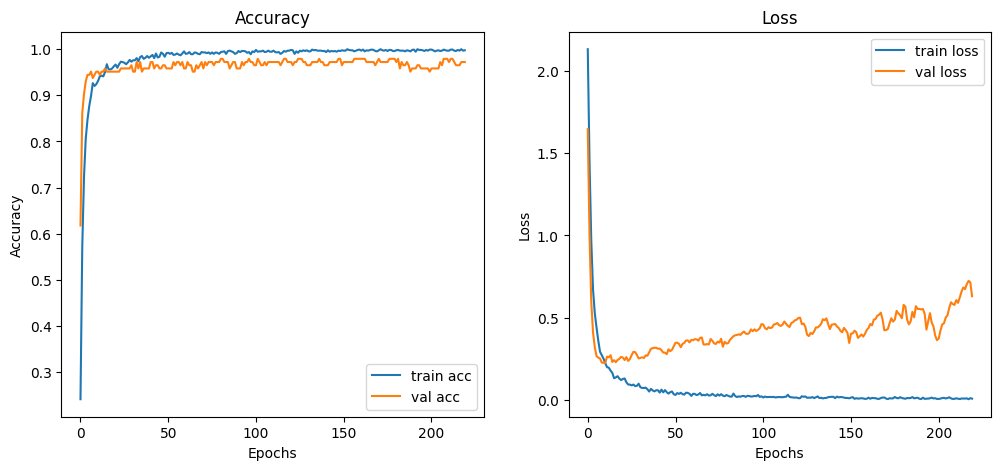

In [8]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history_dict['accuracy'], label='train acc')
plt.plot(history_dict['val_accuracy'], label='val acc')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history_dict['loss'], label='train loss')
plt.plot(history_dict['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

In [21]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_9 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 10)             │           330 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 19,712 (77.00 KB)

 Trainable params: 6,570 (25.66 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 13,142 (51.34 KB)

In [22]:
model_dropout.summary()

NameError: name 'model_dropout' is not defined